All models have been mounted on Google Drive for ease of access

In [1]:
# Install necessary libraries
!pip install transformer_lens
!pip install transformers

In [46]:
import torch
import torch.nn as nn
import numpy as np
import os

from transformer_lens import HookedTransformer, HookedTransformerConfig
from transformers import GPT2Tokenizer, GPT2Config
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [3]:
# Load the tokenizer
model_name = 'gpt2-medium'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Add special tokens
special_tokens_dict = {
    'additional_special_tokens': ['<|startoftext|>', '<|endoftext|>', '<|sep|>', '<|pad|>']
}
tokenizer.add_special_tokens(special_tokens_dict)
tokenizer.pad_token = '<|pad|>'

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
# Load the base GPT-2 Medium model into HookedTransformer
base_model = HookedTransformer.from_pretrained(model_name, device=device)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2-medium into HookedTransformer


<h4> Mounting Google Drive </h4>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Paths to your models in Google Drive
finetuned_model_path = '/saved_models/LR_5e-5_BS_4_E_3'
classifier_model_path = 'best_model_state.bin'

In [7]:
!cp "{finetuned_model_zip_path}" .
!cp "{classifier_model_path}" .
## Now, both finetuned_gpt2_medium.zip and best_model_state_3.3_final.bin are in Colab working directory.

In [ ]:
# Extract the Finetuned GPT-2 Medium Model
# import zipfile

# with zipfile.ZipFile('finetuned_gpt2_medium.zip', 'r') as zip_ref:
#     zip_ref.extractall('finetuned_gpt2_medium')

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the tokenizer
# finetuned_model_path = 'finetuned_gpt2_medium'
tokenizer = GPT2Tokenizer.from_pretrained(finetuned_model_path)

# Add special tokens if necessary
special_tokens_dict = {
    'additional_special_tokens': ['<|startoftext|>', '<|endoftext|>', '<|sep|>', '<|pad|>']
}
tokenizer.add_special_tokens(special_tokens_dict)
tokenizer.pad_token = '<|pad|>'

# Load the finetuned model
finetuned_model = GPT2LMHeadModel.from_pretrained(finetuned_model_path)
finetuned_model.resize_token_embeddings(len(tokenizer))
finetuned_model.to(device)
finetuned_model.eval()

Using device: cpu


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50260, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50260, bias=False)
)

In [10]:
# Load the Base GPT-2 Medium Model into HookedTransformer

from transformer_lens import HookedTransformer

# Load the base GPT-2 Medium model into HookedTransformer
model_name = 'gpt2-medium'
base_model = HookedTransformer.from_pretrained(model_name, device=device)
base_model.eval()

Loaded pretrained model gpt2-medium into HookedTransformer


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-23): 24 x TransformerBlock(
      (ln1): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (h

In [ ]:
import torch.nn as nn

# Define the classification model
class ToxicCommentClassifier(nn.Module):
    def __init__(self, base_model, n_classes=1):
        super(ToxicCommentClassifier, self).__init__()
        self.base_model = base_model  # HookedTransformer model
        self.dropout = nn.Dropout(p=0.3)
        self.out = nn.Linear(base_model.cfg.d_model, n_classes)
        # Freeze GPT-2 parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask=None):
        # Get outputs and cache from the base model
        logits, cache = self.base_model.run_with_cache(input_ids)
        # Access the cache to get the residual stream after the last transformer block
        last_layer = self.base_model.cfg.n_layers - 1
        last_hidden_state = cache['resid_post', last_layer]  # Shape: [batch_size, seq_length, d_model]
        # Pool the outputs (mean pooling)
        pooled_output = torch.mean(last_hidden_state, dim=1)  # Shape: [batch_size, d_model]
        # Apply dropout and classification layer
        output = self.dropout(pooled_output)
        logits = self.out(output)  # Shape: [batch_size, n_classes]
        return logits

# Create the classifier model
classifier_model = ToxicCommentClassifier(base_model=base_model)
classifier_model.to(device)

# Load the classifier's state_dict if available
# classifier_model_path = 'best_model_state_3.3_final.bin'  # Replace with your actual path

classifier_model.load_state_dict(torch.load(classifier_model_path, map_location=device))
classifier_model.eval()

# Extract the weight vector w from the classification head
w = classifier_model.out.weight.data.squeeze(0)  # Shape: [d_model]
print("Shape of w:", w.shape)  # Should be [d_model]

<ipython-input-11-bf5392b4f02f>:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier_model.load_state_dict(torch.load(classifier_model_path, map_location=device))


Shape of w: torch.Size([1024])


# <h1> Approach 1: Extract N (=128) top value vectors from both models independently <h1>

<h4> Extract Value Vectors (v vectors) from the MLP Layers of Both Models </h4>

In [24]:
def extract_value_vectors_hooked(model):
    v_vectors = []
    indices = []
    num_layers = model.cfg.n_layers

    for layer_idx in range(num_layers):
        mlp = model.blocks[layer_idx].mlp

        # W_out has shape [d_model, d_mlp] = [1024, 4096]
        W_out = mlp.W_out.detach().cpu()  # Shape: [1024, 4096]
        print(f"Layer {layer_idx} W_out shape: {W_out.shape}")

        for row_idx in range(W_out.shape[0]):  # Iterate over hidden_size
          v = W_out[row_idx, :]  # Shape: [d_model] = [1024]
          v_vectors.append(v)
          indices.append((layer_idx, row_idx))

    v_vectors_tensor = torch.stack(v_vectors)  # Shape: [total_columns, d_model]
    return v_vectors_tensor, indices

In [25]:
def extract_value_vectors_transformers(model):
    v_vectors = []
    indices = []
    num_layers = model.config.n_layer

    for layer_idx in range(num_layers):
        mlp = model.transformer.h[layer_idx].mlp

        # W_out (c_proj.weight) has shape [d_model, d_mlp] = [1024, 4096]
        W_out = mlp.c_proj.weight.detach().cpu()  # Shape: [1024, 4096]
        print(f"Layer {layer_idx} W_out shape: {W_out.shape}")

        # Iterate over columns of W_out to get v vectors of shape [d_model]
        for row_idx in range(W_out.shape[0]):  # Iterate over hidden_size
          v = W_out[row_idx, :]  # Shape: [d_model] = [1024]
          v_vectors.append(v)
          indices.append((layer_idx, row_idx))

    v_vectors_tensor = torch.stack(v_vectors)  # Shape: [total_columns, d_model]
    return v_vectors_tensor, indices

In [26]:
# Base model
v_vectors_base, indices_base = extract_value_vectors_hooked(base_model)
print("Extracted value vectors from the base model.")

# Finetuned model
v_vectors_finetuned, indices_finetuned = extract_value_vectors_transformers(finetuned_model)
print("Extracted value vectors from the finetuned model.")

Layer 0 W_out shape: torch.Size([4096, 1024])
Layer 1 W_out shape: torch.Size([4096, 1024])
Layer 2 W_out shape: torch.Size([4096, 1024])
Layer 3 W_out shape: torch.Size([4096, 1024])
Layer 4 W_out shape: torch.Size([4096, 1024])
Layer 5 W_out shape: torch.Size([4096, 1024])
Layer 6 W_out shape: torch.Size([4096, 1024])
Layer 7 W_out shape: torch.Size([4096, 1024])
Layer 8 W_out shape: torch.Size([4096, 1024])
Layer 9 W_out shape: torch.Size([4096, 1024])
Layer 10 W_out shape: torch.Size([4096, 1024])
Layer 11 W_out shape: torch.Size([4096, 1024])
Layer 12 W_out shape: torch.Size([4096, 1024])
Layer 13 W_out shape: torch.Size([4096, 1024])
Layer 14 W_out shape: torch.Size([4096, 1024])
Layer 15 W_out shape: torch.Size([4096, 1024])
Layer 16 W_out shape: torch.Size([4096, 1024])
Layer 17 W_out shape: torch.Size([4096, 1024])
Layer 18 W_out shape: torch.Size([4096, 1024])
Layer 19 W_out shape: torch.Size([4096, 1024])
Layer 20 W_out shape: torch.Size([4096, 1024])
Layer 21 W_out shape: t

In [27]:
# After extracting v_vectors_tensor
print("Shape of v_vectors_base:", v_vectors_base.shape)
print("Shape of w:", w.shape)

print("Shape of v_vectors_base:", v_vectors_finetuned.shape)
print("Shape of w:", w.shape)

Shape of v_vectors_base: torch.Size([98304, 1024])
Shape of w: torch.Size([1024])
Shape of v_vectors_base: torch.Size([98304, 1024])
Shape of w: torch.Size([1024])


In [28]:
def compute_cosine_similarities(v_vectors_tensor, w):
    # Normalize w and v vectors
    w_norm = w / w.norm()  # Shape: [d_model]
    v_vectors_norm = v_vectors_tensor / v_vectors_tensor.norm(dim=1, keepdim=True)  # Shape: [total_columns, d_model]

    # Compute cosine similarities
    cosine_similarities = torch.matmul(v_vectors_norm, w_norm.to(v_vectors_norm.device))  # Shape: [total_columns]

    # Move to CPU for processing
    cosine_similarities = cosine_similarities.cpu().numpy()
    return cosine_similarities

In [29]:
# Base model
cosine_sim_base = compute_cosine_similarities(v_vectors_base, w)
print("Computed cosine similarities for the base model.")

# Finetuned model
cosine_sim_finetuned = compute_cosine_similarities(v_vectors_finetuned, w)
print("Computed cosine similarities for the finetuned model.")

Computed cosine similarities for the base model.
Computed cosine similarities for the finetuned model.


<h4> Identify the Top N Value Vectors with Highest Similarity </h4>

In [30]:
import numpy as np

def get_top_n_value_vectors(cosine_similarities, indices, v_vectors_tensor, N=128):
    # Get the indices of the top N similarities
    top_n_indices = np.argsort(cosine_similarities)[-N:][::-1]  # Indices of top N similarities

    # Collect the top N vectors and their information
    top_n_info = []
    for idx in top_n_indices:
        sim = cosine_similarities[idx]
        layer_idx, col_idx = indices[idx]
        v_vector = v_vectors_tensor[idx].cpu().numpy()
        top_n_info.append({
            'layer': layer_idx,
            'column': col_idx,
            'similarity': sim,
            'v_vector': v_vector
        })

    return top_n_info

N = 128  # Number of top vectors to extract

# Base model
top_n_info_base = get_top_n_value_vectors(cosine_sim_base, indices_base, v_vectors_base, N=N)
print(f"Extracted top {N} value vectors from the base model.")

# Finetuned model
top_n_info_finetuned = get_top_n_value_vectors(cosine_sim_finetuned, indices_finetuned, v_vectors_finetuned, N=N)
print(f"Extracted top {N} value vectors from the finetuned model.")

Extracted top 128 value vectors from the base model.
Extracted top 128 value vectors from the finetuned model.


<h4> Projecting Value Vectors into Vocabulary Space </h4>

In [40]:
def project_vectors_into_vocab_space_hooked(model, v_vectors_info, tokenizer, top_k=5):
    W_U = model.W_U.detach().cpu()  # Shape: [1024, vocab_size]
    W_U_T = W_U.t()  # Shape: [vocab_size, 1024]

    for info in v_vectors_info:
        layer_idx = info['layer']
        col_idx = info['column']
        v_vector = info['v_vector']  # Numpy array of shape [1024]

        # Convert v_vector to a tensor
        v_tensor = torch.tensor(v_vector, dtype=W_U_T.dtype)  # Shape: [1024]

        # Project v_vector onto the vocabulary space
        scores = torch.matmul(W_U_T, v_tensor)  # Shape: [vocab_size]

        # Get the top k tokens
        topk_values, topk_indices = torch.topk(scores, k=top_k)

        # Map token IDs to tokens
        tokens = [tokenizer.decode([idx.item()]) for idx in topk_indices]

        # Print the results
        print(f"Value Vector: Layer {layer_idx}, Column {col_idx}")
        for rank, (token_id, token, score) in enumerate(zip(topk_indices, tokens, topk_values), 1):
            print(f"  Rank {rank}: Token ID: {token_id.item()}, Token: '{token}', Score: {score.item():.4f}")
        print()

def project_vectors_into_vocab_space_transformers(model, v_vectors_info, tokenizer, top_k=5):
    W_U = model.lm_head.weight.detach().cpu()  # Shape: [vocab_size, 1024]

    for info in v_vectors_info:
        layer_idx = info['layer']
        col_idx = info['column']
        v_vector = info['v_vector']  # Numpy array of shape [1024]

        # Convert v_vector to a tensor
        v_tensor = torch.tensor(v_vector, dtype=W_U.dtype)  # Shape: [1024]

        # Project v_vector onto the vocabulary space
        scores = torch.matmul(W_U, v_tensor)  # Shape: [vocab_size]

        # Get the top k tokens
        topk_values, topk_indices = torch.topk(scores, k=top_k)

        # Map token IDs to tokens
        tokens = [tokenizer.decode([idx.item()]) for idx in topk_indices]

        # Print the results
        print(f"Value Vector: Layer {layer_idx}, Column {col_idx}")
        for rank, (token_id, token, score) in enumerate(zip(topk_indices, tokens, topk_values), 1):
            print(f"  Rank {rank}: Token ID: {token_id.item()}, Token: '{token}', Score: {score.item():.4f}")
        print()

# Project top 5 value vectors for demonstration
top_n_vectors_to_project = 5

print("\nProjecting top value vectors from the base model into vocabulary space:\n")
project_vectors_into_vocab_space_hooked(base_model, top_n_info_base[:top_n_vectors_to_project], tokenizer, top_k=5)

print("\nProjecting top value vectors from the finetuned model into vocabulary space:\n")
project_vectors_into_vocab_space_transformers(finetuned_model, top_n_info_finetuned[:top_n_vectors_to_project], tokenizer, top_k=5)


Projecting top value vectors from the base model into vocabulary space:

Value Vector: Layer 19, Column 770
  Rank 1: Token ID: 7510, Token: ' shit', Score: 5.6296
  Rank 2: Token ID: 840, Token: ' ass', Score: 5.2609
  Rank 3: Token ID: 18824, Token: ' crap', Score: 5.0376
  Rank 4: Token ID: 50201, Token: ' asses', Score: 4.9517
  Rank 5: Token ID: 5089, Token: ' fuck', Score: 4.9283

Value Vector: Layer 18, Column 2669
  Rank 1: Token ID: 25419, Token: ' degener', Score: 3.9135
  Rank 2: Token ID: 48978, Token: ' whining', Score: 3.9050
  Rank 3: Token ID: 35838, Token: ' idiots', Score: 3.6103
  Rank 4: Token ID: 8531, Token: ' stupid', Score: 3.6080
  Rank 5: Token ID: 27590, Token: ' smug', Score: 3.6002

Value Vector: Layer 16, Column 255
  Rank 1: Token ID: 27690, Token: ' disgrace', Score: 5.2128
  Rank 2: Token ID: 34078, Token: ' shameful', Score: 5.1772
  Rank 3: Token ID: 26769, Token: ' coward', Score: 5.1183
  Rank 4: Token ID: 18010, Token: ' unacceptable', Score: 4.94

<h3> Observe! The Top 5 Vectors are the same, only with reduced cosine weights!! </h3>

<h4> Perform SVD on the Top N Value Vectors </h4>

In [41]:
def perform_svd_analysis(top_n_info, w, model, tokenizer, k=3, top_k_tokens=5, is_hooked_model=True):
    # Stack the v_vectors into a matrix V of shape [N, 1024]
    V = np.stack([info['v_vector'] for info in top_n_info])  # Shape: [N, 1024]

    # Centering the data
    mean_vector = np.mean(V, axis=0)  # Shape: [1024]
    V_centered = V - mean_vector  # Shape: [N, 1024]

    # Perform SVD on the centered data
    U, S, VT = np.linalg.svd(V_centered, full_matrices=False)

    # Extract the basis vectors
    V_singular_vectors = VT.T  # Shape: [1024, N]
    basis_vectors = V_singular_vectors[:, :k]  # Shape: [1024, k]

    # Analyze the singular values
    print("Singular values:", S[:k])

    # Project w onto the basis vectors
    w_numpy = w.cpu().numpy()
    coefficients_w = np.dot(w_numpy - mean_vector, basis_vectors)  # Shape: [k]
    print("Projection coefficients of w onto the basis vectors:", coefficients_w)

    # Project basis vectors into vocabulary space
    if is_hooked_model:
        W_U = model.W_U.detach().cpu()  # Shape: [1024, vocab_size]
        W_U_T = W_U.t()  # Shape: [vocab_size, 1024]
    else:
        W_U = model.lm_head.weight.detach().cpu()  # Shape: [vocab_size, 1024]
        W_U_T = W_U  # Shape: [vocab_size, 1024]

    basis_vectors_tensor = torch.tensor(basis_vectors, dtype=W_U_T.dtype)  # Shape: [1024, k]
    bscores = torch.matmul(W_U_T, basis_vectors_tensor)  # Shape: [vocab_size, k]

    for i in range(k):
        # Get the scores for the i-th basis vector
        basis_vector_scores = bscores[:, i]  # Shape: [vocab_size]

        # Get the top tokens
        topk_values, topk_indices = torch.topk(basis_vector_scores, k=top_k_tokens)

        # Decode the token IDs to tokens
        tokens = [tokenizer.decode([idx.item()]) for idx in topk_indices]

        # Print the results
        print(f"Basis Vector {i+1}:")
        for rank, (token_id, token, score) in enumerate(zip(topk_indices, tokens, topk_values), 1):
            print(f"  Rank {rank}: Token ID: {token_id.item()}, Token: '{token}', Score: {score.item():.4f}")
        print()

    # Return the singular values
    return S[:k]

# Perform SVD analysis and capture singular values
print("\nPerforming SVD analysis on the top N value vectors from the base model:\n")
S_base = perform_svd_analysis(top_n_info_base, w, base_model, tokenizer, k=k, top_k_tokens=5, is_hooked_model=True)

print("\nPerforming SVD analysis on the top N value vectors from the finetuned model:\n")
S_finetuned = perform_svd_analysis(top_n_info_finetuned, w, finetuned_model, tokenizer, k=k, top_k_tokens=5, is_hooked_model=False)


Performing SVD analysis on the top N value vectors from the base model:

Singular values: [7.0115466 6.8991647 6.225186 ]
Projection coefficients of w onto the basis vectors: [ 0.22968382 -0.06861717 -0.04475369]
Basis Vector 1:
  Rank 1: Token ID: 38693, Token: ' Beir', Score: 0.7817
  Rank 2: Token ID: 41383, Token: 'assetsadobe', Score: 0.7472
  Rank 3: Token ID: 36901, Token: ' Reflect', Score: 0.7449
  Rank 4: Token ID: 30227, Token: 'rieve', Score: 0.7076
  Rank 5: Token ID: 24401, Token: 'ARA', Score: 0.7021

Basis Vector 2:
  Rank 1: Token ID: 37323, Token: ' fools', Score: 0.9092
  Rank 2: Token ID: 28858, Token: ' cynical', Score: 0.8613
  Rank 3: Token ID: 35838, Token: ' idiots', Score: 0.8264
  Rank 4: Token ID: 8531, Token: ' stupid', Score: 0.8157
  Rank 5: Token ID: 31644, Token: ' goof', Score: 0.8122

Basis Vector 3:
  Rank 1: Token ID: 3239, Token: 'ovember', Score: 0.5930
  Rank 2: Token ID: 49159, Token: ' mashed', Score: 0.5417
  Rank 3: Token ID: 39426, Token: '

<h4> Plot Singular Values <h4>


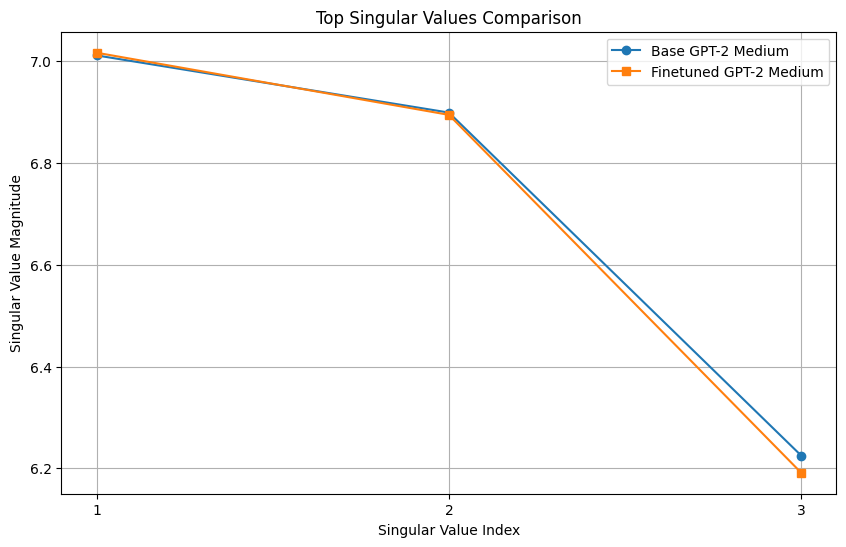

In [42]:
import matplotlib.pyplot as plt

def plot_singular_values(S_base, S_finetuned, k=3):
    indices = np.arange(1, k+1)

    plt.figure(figsize=(10, 6))
    plt.plot(indices, S_base, marker='o', label='Base GPT-2 Medium')
    plt.plot(indices, S_finetuned, marker='s', label='Finetuned GPT-2 Medium')
    plt.title('Top Singular Values Comparison')
    plt.xlabel('Singular Value Index')
    plt.ylabel('Singular Value Magnitude')
    plt.xticks(indices)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the singular values
plot_singular_values(S_base, S_finetuned, k=k)

# Approach 2: Study the changes in Base Value Vectors after Finetuning

In [43]:
print(f"Number of top value vectors extracted from the base model: {len(top_n_info_base)}")

Number of top value vectors extracted from the base model: 128


<h4> Locate Corresponding Value Vectors in the Finetuned Model </h4>

In [44]:
# Convert finetuned model's value vectors and indices to a dictionary for quick lookup
finetuned_dict = {}
for info in top_n_info_finetuned:
    key = (info['layer'], info['column'])
    finetuned_dict[key] = info['v_vector']

# Prepare a list to store comparison information
comparison_data = []

for idx, base_info in enumerate(top_n_info_base):
    layer = base_info['layer']
    column = base_info['column']
    similarity_base = base_info['similarity']
    v_base = base_info['v_vector']

    # Retrieve the corresponding vector in the finetuned model
    finetuned_vector = finetuned_dict.get((layer, column), None)

    if finetuned_vector is not None:
        # Compute cosine similarity in the finetuned model
        v_finetuned = torch.tensor(finetuned_vector, dtype=torch.float32).to(device)
        w_norm = w / w.norm()
        v_finetuned_norm = v_finetuned / v_finetuned.norm()
        similarity_finetuned = torch.dot(v_finetuned_norm, w_norm).item()

        # Compute the difference
        similarity_diff = similarity_finetuned - similarity_base

        # Decode tokens promoted by the base and finetuned vectors
        # (Optional: If you want to analyze token promotions)

        comparison_data.append({
            'rank': idx + 1,
            'layer': layer,
            'column': column,
            'similarity_base': similarity_base,
            'similarity_finetuned': similarity_finetuned,
            'similarity_diff': similarity_diff
        })
    else:
        print(f"Finetuned vector not found for Layer {layer}, Column {column}")

Finetuned vector not found for Layer 5, Column 2498


In [47]:
## Compare Comparison data to dataframe

# Create a DataFrame from the comparison data
df_comparison = pd.DataFrame(comparison_data)

# Display the first few entries
df_comparison.head()

,rank,layer,column,similarity_base,similarity_finetuned,similarity_diff
0,1,19,770,0.232888,0.232964,0.000076
1,2,18,2669,0.190135,0.190416,0.000281
2,3,16,255,0.189711,0.189238,-0.000474
3,4,19,3341,0.175189,0.175513,0.000325
4,5,12,882,0.163188,0.163444,0.000256


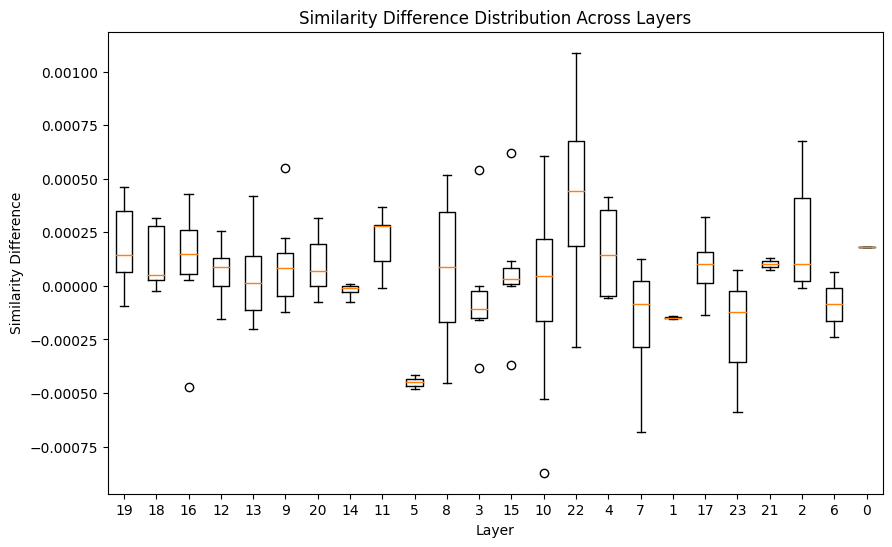

In [52]:
# @title Similarity Difference Distribution Across Layers

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_comparison'

plt.figure(figsize=(10, 6))
plt.boxplot([df_comparison['similarity_diff'][df_comparison['layer'] == i] for i in df_comparison['layer'].unique()], labels=df_comparison['layer'].unique())
plt.xlabel('Layer')
plt.ylabel('Similarity Difference')
_ = plt.title('Similarity Difference Distribution Across Layers')

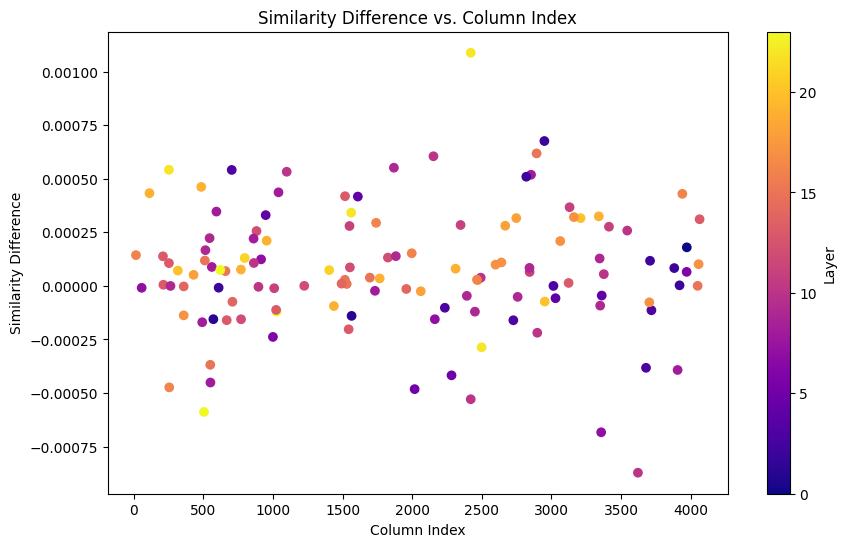

In [50]:
# @title Similarity Difference vs. Column Index

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_comparison'
plt.figure(figsize=(10, 6))
plt.scatter(df_comparison['column'], df_comparison['similarity_diff'], c=df_comparison['layer'], cmap='plasma')
plt.title('Similarity Difference vs. Column Index')
plt.xlabel('Column Index')
plt.ylabel('Similarity Difference')
_ = plt.colorbar(label='Layer')

<h4> Analyse Differences </h4>

In [51]:
# Summary statistics of similarity differences
print(df_comparison['similarity_diff'].describe())


count    127.000000
mean       0.000070
std        0.000286
min       -0.000872
25%       -0.000074
50%        0.000065
75%        0.000239
max        0.001089
Name: similarity_diff, dtype: float64


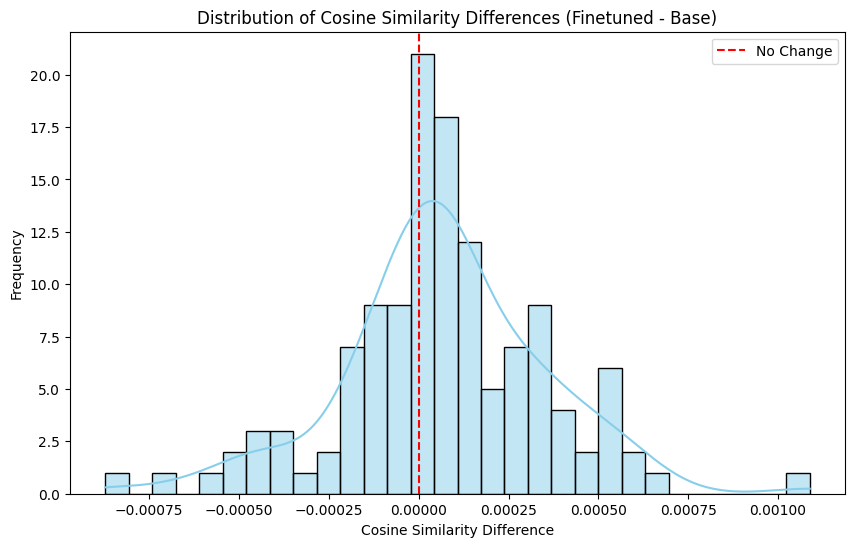

In [53]:
# Plot the distribution of similarity differences
plt.figure(figsize=(10, 6))
sns.histplot(df_comparison['similarity_diff'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Cosine Similarity Differences (Finetuned - Base)')
plt.xlabel('Cosine Similarity Difference')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Change')
plt.legend()
plt.show()

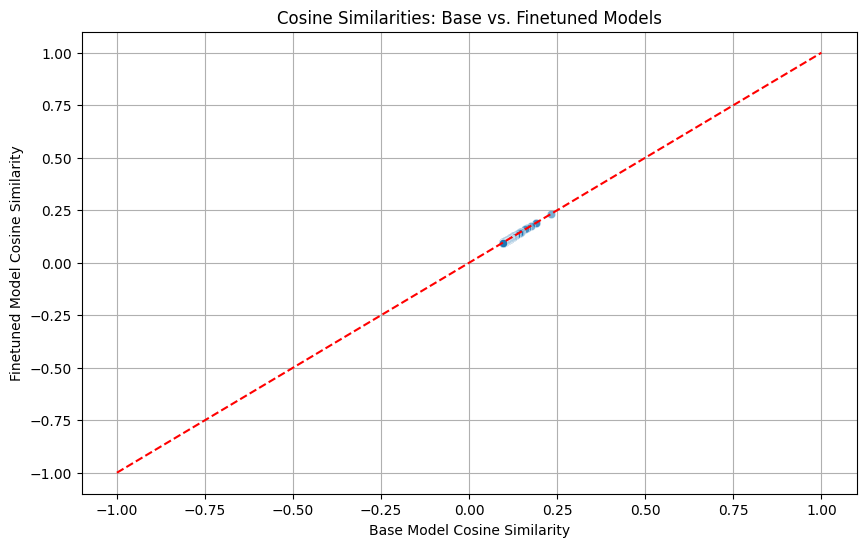

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='similarity_base', y='similarity_finetuned', data=df_comparison, alpha=0.6)
plt.title('Cosine Similarities: Base vs. Finetuned Models')
plt.xlabel('Base Model Cosine Similarity')
plt.ylabel('Finetuned Model Cosine Similarity')
plt.plot([-1, 1], [-1, 1], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()

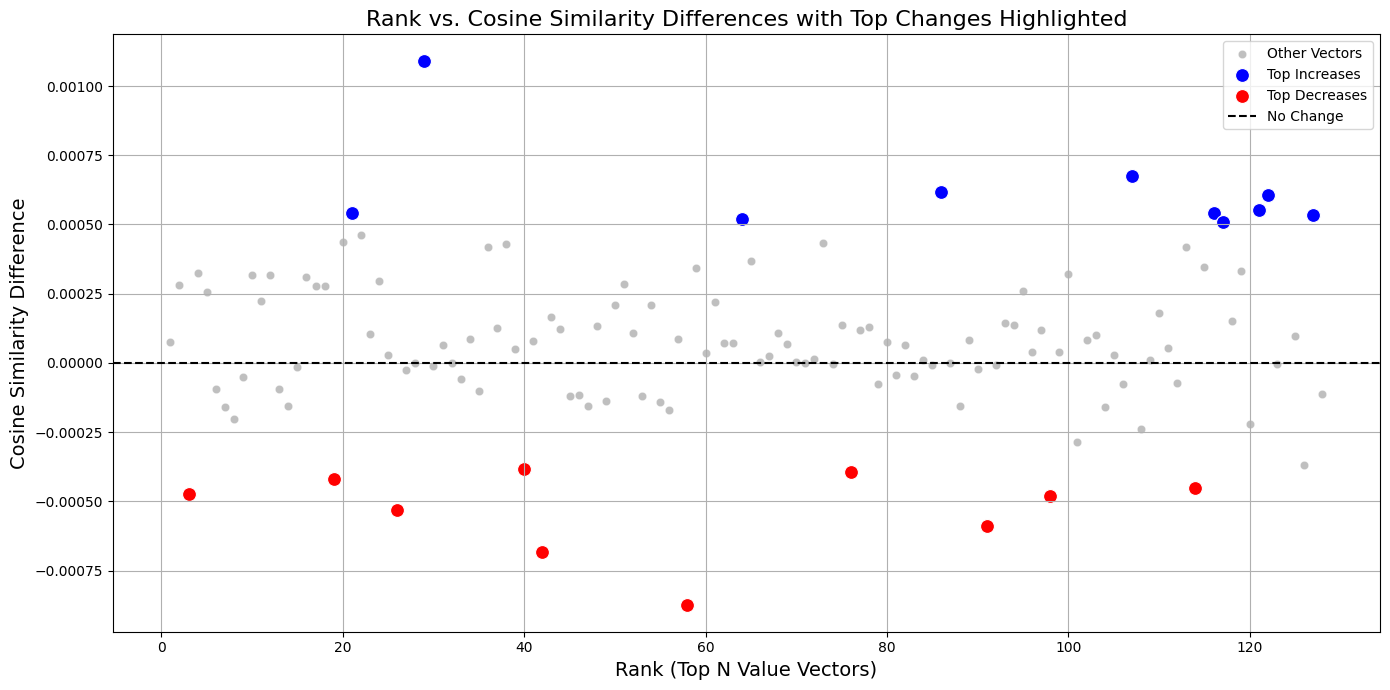

In [56]:
# Identify top 10 increases and top 10 decreases
top_increases = df_comparison.nlargest(10, 'similarity_diff')
top_decreases = df_comparison.nsmallest(10, 'similarity_diff')

plt.figure(figsize=(14, 7))
sns.scatterplot(
    x='rank',
    y='similarity_diff',
    data=df_comparison,
    color='grey',
    alpha=0.5,
    label='Other Vectors'
)

# Highlight top increases
sns.scatterplot(
    x='rank',
    y='similarity_diff',
    data=top_increases,
    color='blue',
    s=100,
    label='Top Increases'
)

# Highlight top decreases
sns.scatterplot(
    x='rank',
    y='similarity_diff',
    data=top_decreases,
    color='red',
    s=100,
    label='Top Decreases'
)

plt.axhline(0, color='black', linestyle='--', label='No Change')
plt.title('Rank vs. Cosine Similarity Differences with Top Changes Highlighted', fontsize=16)
plt.xlabel('Rank (Top N Value Vectors)', fontsize=14)
plt.ylabel('Cosine Similarity Difference', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

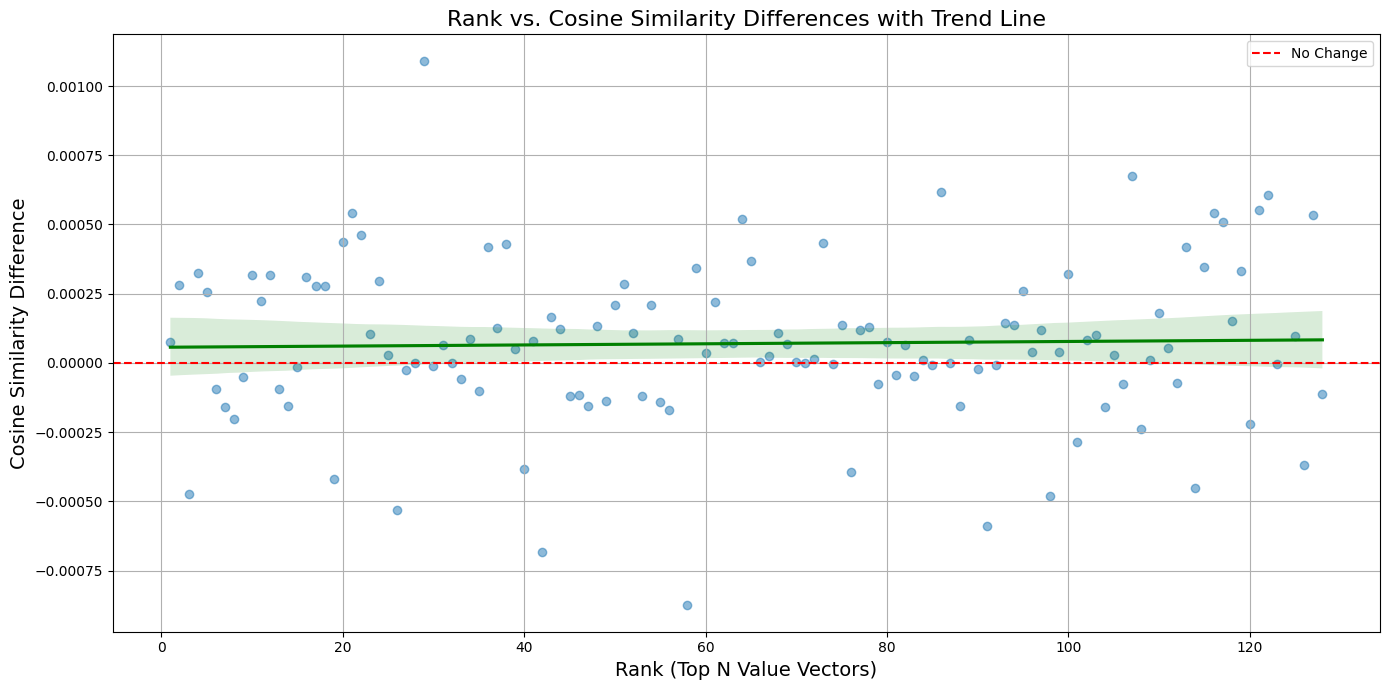

In [57]:
plt.figure(figsize=(14, 7))
sns.regplot(x='rank', y='similarity_diff', data=df_comparison, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.axhline(0, color='red', linestyle='--', label='No Change')
plt.title('Rank vs. Cosine Similarity Differences with Trend Line', fontsize=16)
plt.xlabel('Rank (Top N Value Vectors)', fontsize=14)
plt.ylabel('Cosine Similarity Difference', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

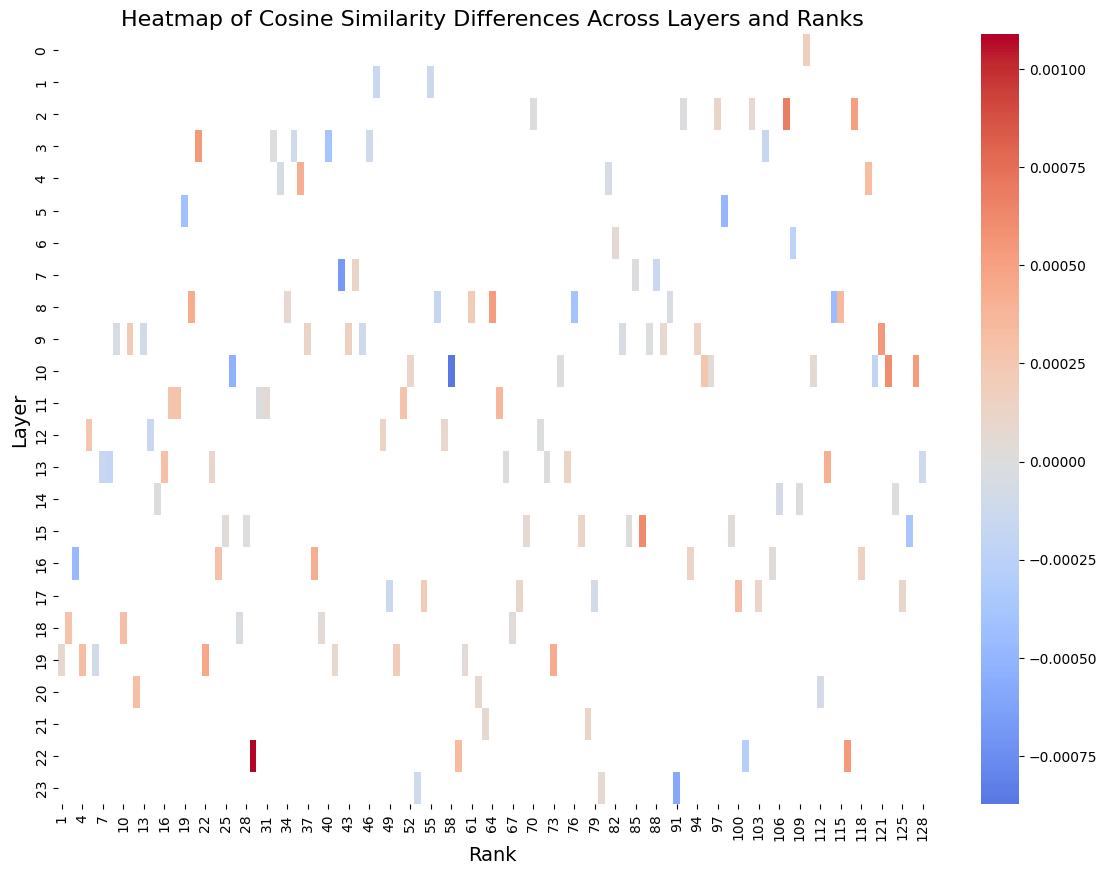

In [58]:
# Create a pivot table for heatmap
heatmap_data = df_comparison.pivot_table(
    index='layer',
    columns='rank',
    values='similarity_diff',
    aggfunc='mean'
)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0)
plt.title('Heatmap of Cosine Similarity Differences Across Layers and Ranks', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Layer', fontsize=14)
plt.show()
